In [2]:
import os
import time
import json
import parse
import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.metrics import f1_score
datadir = "/home/peterr/macocu/task5_webgenres/data/final/fasttext2"

dev_dd = os.path.join(datadir, "dev_onlyprimary_True_dedup_True.fasttext")
test_dd = os.path.join(datadir, "test_onlyprimary_True_dedup_True.fasttext")
train_dd = os.path.join(datadir, "train_onlyprimary_True_dedup_True.fasttext")


for filename in [ train_dd,  test_dd,  dev_dd]:
    try:
        _ = parse_fasttext_file(filename)
    except Exception as e:
        raise e

# reduced_labels = ['__label__Information/Explanation', '__label__Opinion/Argumentation', '__label__Promotion_of_a_Product', '__label__List_of_Summaries/Excerpts', '__label__Promotion_of_Services', '__label__News/Reporting', '__label__Opinionated_News', '__label__Announcement', '__label__Invitation', '__label__Instruction', '__label__Forum', '__label__Prose', '__label__Recipe', '__label__Other', '__label__Legal/Regulation', '__label__Promotion', '__label__Review', '__label__Interview', '__label__Call', '__label__Correspondence', '__label__Research_Article']
# REDUCED_STR_TO_NUM = {s: i for i, s in enumerate(reduced_labels)}
# REDUCED_NUM_TO_STR = {i: s for i, s in enumerate(reduced_labels)}
# def reindex_num_labels(i):
#     str_label = NUM_TO_STR[i]
#     return REDUCED_STR_TO_NUM[i]

import pandas as pd

results = list()
dev_dd_df = parse_fasttext_file(dev_dd)
test_dd_df = parse_fasttext_file(test_dd)
train_dd_df = parse_fasttext_file(train_dd)

test_dd_df["labels"] = test_dd_df.labels.apply(downsample_second)#.apply(reindex_num_labels)
train_dd_df["labels"] = train_dd_df.labels.apply(downsample_second)#.apply(reindex_num_labels)
dev_dd_df["labels"] = dev_dd_df.labels.apply(downsample_second)#.apply(reindex_num_labels)

In [4]:
for i in range(5):
    print("run: ", i)

    model = train_model(train_dd_df, num_labels=12, use_cuda=True)

    rundict = eval_model(test_dd_df, model)
    rundict["train"] = "downsampled_dd"
    rundict["eval"] = "downsampled_test_dd"
    results.append(rundict)

    rundict = eval_model(dev_dd_df, model)
    rundict["train"] = "downsampled_dd"
    rundict["eval"] = "downsampled_dev_dd"
    results.append(rundict)

import json
with open("backup_21.txt", "w") as f:
    json.dump(results, f)

run:  0


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'roberta.pooler.dense.weight',

run:  1


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'roberta.pooler.dense.weight',

run:  2


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'roberta.pooler.dense.weight',

run:  3


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'roberta.pooler.dense.weight',

run:  4


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'roberta.pooler.dense.weight',

~~Perhaps this is a shitty way of doing it because the model still expects 21 labels. I shall correct this and then continue.~~

This is now corrected. The model expects the correct number of classes, although the numbering is not changed.


Training raises issues:

```python
~/macocu/task5_webgenres/utils.py in train_model(train_df, NUM_EPOCHS, num_labels)
     62         args = model_args
     63     )
---> 64     model.train_model(train_df)
     65     return model
     66 

~/anaconda3/lib/python3.8/site-packages/simpletransformers/classification/classification_model.py in train_model(self, train_df, multi_label, output_dir, show_running_loss, args, eval_df, verbose, **kwargs)
    633         os.makedirs(output_dir, exist_ok=True)
    634 
--> 635         global_step, training_details = self.train(
    636             train_dataloader,
    637             output_dir,

~/anaconda3/lib/python3.8/site-packages/simpletransformers/classification/classification_model.py in train(self, train_dataloader, output_dir, multi_label, show_running_loss, eval_df, verbose, **kwargs)
    919                     )  # mean() to average on multi-gpu parallel training
    920 
--> 921                 current_loss = loss.item()
    922 
    923                 if show_running_loss:

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
```

~~I will now try enabling cache. If this fails, I will resort to disabling CUDA~~

Enabling cache did not work. I am disabling CUDA.

In [1]:
from utils import read_record, REDUCED_NUM_TO_STR, REDUCED_STR_TO_NUM, reduced_labels
import pandas as pd
import numpy as np

df = pd.concat(
    [read_record(file) for file in [
    "backup_17.txt",
    "backup_17__2.txt",
    "backup_18.txt",
    "backup_18_2.txt",
    "backup_20.txt",
    "backup_20_2.txt",
    "backup_21.txt"
]], ignore_index=True)

c1 = df.train=="downsampled_dd"
c2 = df["eval"] == "downsampled_test_dd"
c3 = df["eval"] == "downsampled_dev_dd"
from sklearn.metrics import f1_score

subset = df.loc[c1 & (c2 | c3),:].copy()
for i in subset.index:
    y_true = subset.loc[i, "y_true"]
    y_pred = subset.loc[i, "y_pred"]
    y_true = [REDUCED_NUM_TO_STR[j] for j in y_true]
    y_pred = [REDUCED_NUM_TO_STR[j] for j in y_pred]

    subset.loc[i, "microF1"] = f1_score(y_true, y_pred, average="micro", labels=reduced_labels)
    subset.loc[i, "macroF1"] = f1_score(y_true, y_pred, average="macro", labels=reduced_labels)


print(subset.groupby("eval").agg("mean,std".split(",")).to_markdown())

| eval                |   ('microF1', 'mean') |   ('microF1', 'std') |   ('macroF1', 'mean') |   ('macroF1', 'std') |
|:--------------------|----------------------:|---------------------:|----------------------:|---------------------:|
| downsampled_dev_dd  |              0.679397 |           0.00655196 |              0.668627 |            0.0202979 |
| downsampled_test_dd |              0.696447 |           0.0126395  |              0.668278 |            0.0316177 |


microF1=0.6964
macroF1=0.6786


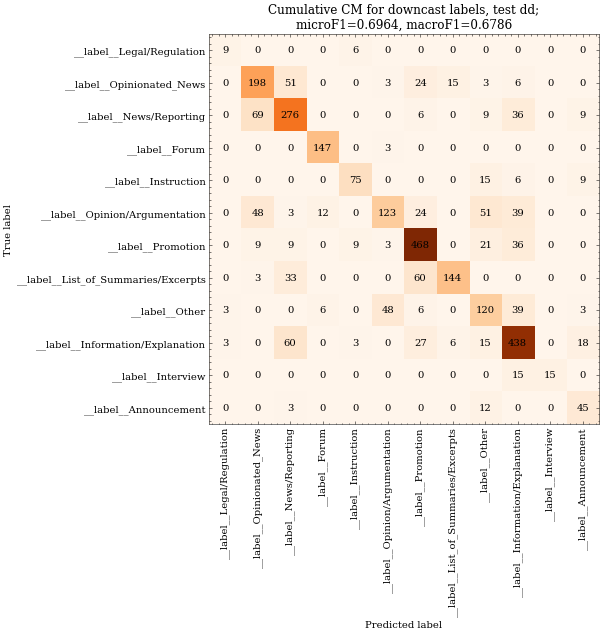

(0.6964467005076143, 0.6786419433045543)

In [2]:
c = c1 & c2

y_true = np.array([i for i in df[c].y_true.values]).reshape(-1)
y_pred = np.array([i for i in df[c].y_pred.values]).reshape(-1)

from utils import REDUCED_NUM_TO_STR
y_true = [REDUCED_NUM_TO_STR[i] for i in y_true]
y_pred = [REDUCED_NUM_TO_STR[i] for i in y_pred]

from utils import plot_cm, reduced_labels

plot_cm(y_true, y_pred, #save="images/21_train_all_cm.png",
title="Cumulative CM for downcast labels, test dd", labels=reduced_labels)

microF1=0.6794
macroF1=0.6708


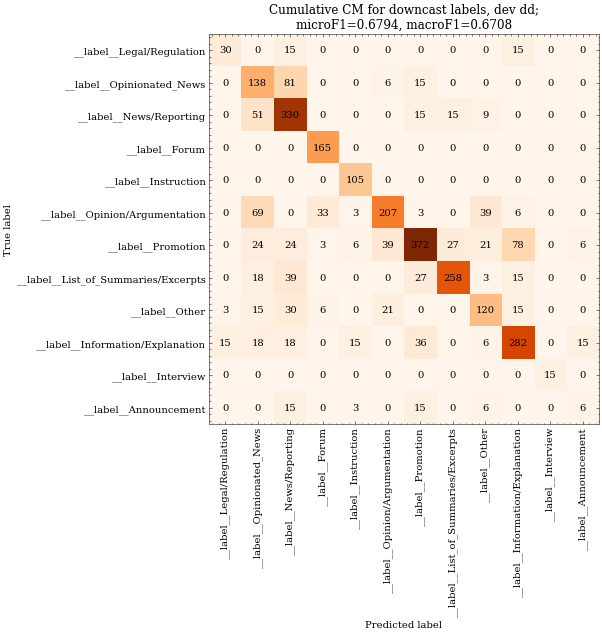

(0.6793969849246231, 0.6708163772419352)

In [4]:
c = c1 & c3

y_true = np.array([i for i in df[c].y_true.values]).reshape(-1)
y_pred = np.array([i for i in df[c].y_pred.values]).reshape(-1)

from utils import REDUCED_NUM_TO_STR
y_true = [REDUCED_NUM_TO_STR[i] for i in y_true]
y_pred = [REDUCED_NUM_TO_STR[i] for i in y_pred]

from utils import plot_cm, reduced_labels

plot_cm(y_true, y_pred, save="images/21_dev_all_cm.png",
title="Cumulative CM for downcast labels, dev dd", labels=reduced_labels)

microF1=0.6879
macroF1=0.6798


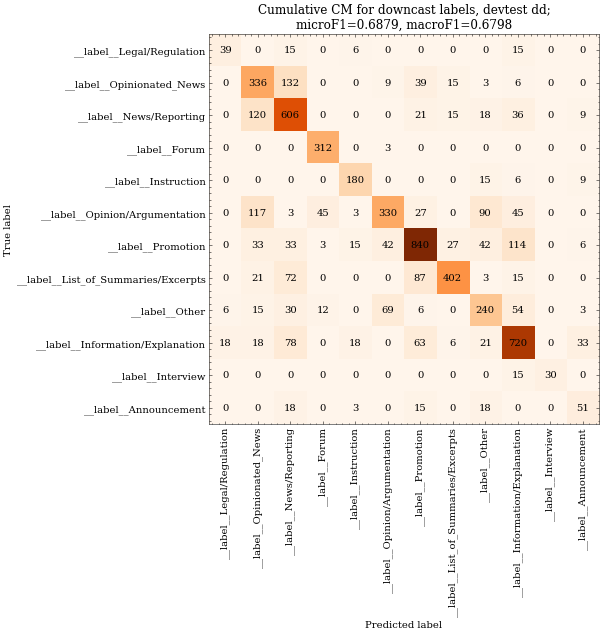

(0.6878787878787879, 0.6798169937556989)

In [39]:
c = c1 & (c2)

y_true = np.array([i for i in df[c].y_true.values]).reshape(-1).tolist()
y_pred = np.array([i for i in df[c].y_pred.values]).reshape(-1).tolist()

c = c1 & (c3)
y_true.extend(np.array([i for i in df[c].y_true.values]).reshape(-1).tolist())
y_pred.extend(np.array([i for i in df[c].y_pred.values]).reshape(-1).tolist())

y_true = [REDUCED_NUM_TO_STR[i] for i in y_true]
y_pred = [REDUCED_NUM_TO_STR[i] for i in y_pred]

from utils import plot_cm, reduced_labels

plot_cm(y_true, y_pred, save="images/21_devtest_all_cm.png",
title="Cumulative CM for downcast labels, devtest dd", labels=reduced_labels)